# Data_Storytelling_Case_Study: Fast Food Marketing<a id='2_Data_wrangling'></a>

## 0. Table of Contents<a id='2.1_Contents'></a>
* 2. Bank_Churnrate_Data_Wrangling
  * 2.1 Table of Contents
  * 2.2 Introduction
  * 2.3 Imports
  * 2.4 Load Supply Chain Train Data
  * 2.5 Explore The Data
    * 2.5.1 Number Of Missing Values By Column & Assessing the Data
    * 2.5.2 Categorical Features
      * 2.5.2.1 Unique Categorical Data
      * 2.5.2.2 Assessing User Base
    * 2.5.3 Numeric Features
      * 2.5.3.1 Numeric data summary
      * 2.5.3.2 Distributions Of Feature Values
  * 2.6 Target Feature (Attrition Flag)
    * 2.11.1 Number Of Missing Values By Row - Resort
  * 2.7 Save data
  * 2.8 Summary


## 1. Introduction

Fast Food Company dataset retreived from: https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test/
details different columns as mentioned in the summary within the link of MarketID, MarketSize (size of the market given sales), LocationID, AgeofStore in years, Promotion (details which promotion was lauched for the store), week (which week of the 4 weeks of a month the promotion was tested on), and SalesinThousands (amount of sales given LocationID, Promotion, and week). 

The goal of this notebook is to glean any important insights or trends given the dataset to understand the customer user base and potential future work would be to given the features predict with different Regression Analysis models the SalesinThounsands for a store and promotion number to assist with future company decision making.

## 2. Imports<a id='2.3_Imports'></a>

Importing all appropriate packages in order to verify/clean the databset provided.

In [62]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import os
from ydata_profiling import ProfileReport

## 3. Load Fast Food Marketing Data

In [47]:
# Load the CSV Fast Food Marketing Data
food_df = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Springboard/Data_Storytelling_Case_Study/WA_Marketing_Campaign.csv')

Auditing the dataset with .info() and .head() displaying the first few records.

In [48]:
#info method on bank_df to see a summary of the data
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [5]:
#head method on bank_df to print the first several rows of the data
food_df.head()

MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
0         1     Medium           1           4          3     1   
1         1     Medium           1           4          3     2   
2         1     Medium           1           4          3     3   
3         1     Medium           1           4          3     4   
4         1     Medium           2           5          2     1   

   SalesInThousands  
0             33.73  
1             35.67  
2             29.03  
3             39.25  
4             27.81

## 4. Explore The Data

### 4.1 Assess Missing Values By Column

Count the number of missing values in each column.

In [49]:
food_df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

The dataset intially seems 'tidy' where every feature has filled in observations, however a further analysis is needed to see if any values have been imputed with 0 or 'missing', etc.

In [7]:
#Assessing columns as well based on .describe() method
food_df.describe().T

count        mean         std    min      25%    50%  \
MarketID          548.0    5.715328    2.877001   1.00    3.000    6.0   
LocationID        548.0  479.656934  287.973679   1.00  216.000  504.0   
AgeOfStore        548.0    8.503650    6.638345   1.00    4.000    7.0   
Promotion         548.0    2.029197    0.810729   1.00    1.000    2.0   
week              548.0    2.500000    1.119055   1.00    1.750    2.5   
SalesInThousands  548.0   53.466204   16.755216  17.34   42.545   50.2   

                       75%     max  
MarketID            8.0000   10.00  
LocationID        708.0000  920.00  
AgeOfStore         12.0000   28.00  
Promotion           3.0000    3.00  
week                3.2500    4.00  
SalesInThousands   60.4775   99.65

In [54]:
#Assessing number of categorical columns in the dataset.
food_df.select_dtypes(object)

MarketSize
0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
..         ...
543      Large
544      Large
545      Large
546      Large
547      Large

[548 rows x 1 columns]

In [55]:
#Determing all the unique values found in the categorical column.
food_df['MarketSize'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

It seems looking at the describe for the numerical feature and slicing to retrieve the categorical feature, that for the numerical values the minumum value is 1 for most of the columns, meaning there is no imputed 0 column and for the categorical column, it seems there is no 'missing' or other form of imputation for any missing data. Therefore, the dataset seems tidy.

In [45]:
#Created a ydata profile report to provide further analysis breakdown of dataset.
profile = ProfileReport(food_df, title="Profiling Report")
profile.to_file('Fast_Food_Dataset_Profile_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.2 Assessing Marketing Data Based on Features

The following steps will allow us to retreive information regarding the dataset for the current Marketing Data.

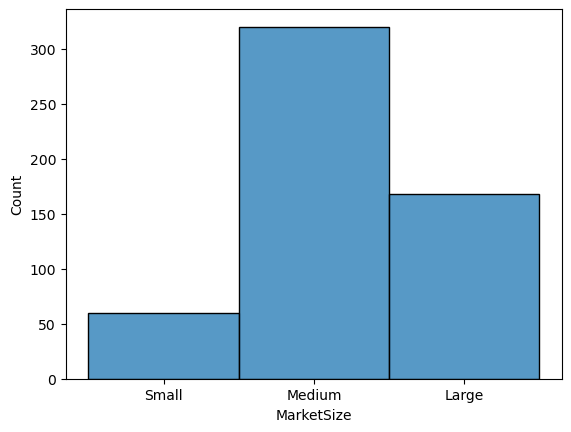

In [31]:
#Plot distribution of MarketSize
#Code to reorient order of categorical column found on https://stackoverflow.com/questions/44067951/sorting-categorical-labels-in-seaborn-chart
sns.histplot(data=food_df.sort_values(by='MarketSize', ascending=False), x='MarketSize')
plt.show()

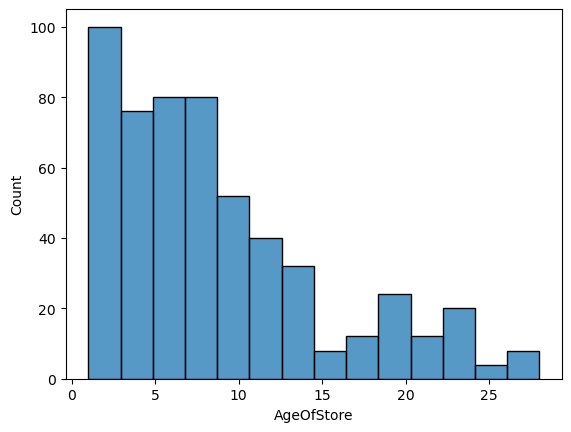

In [13]:
sns.histplot(data=food_df , x='AgeOfStore')
plt.show()

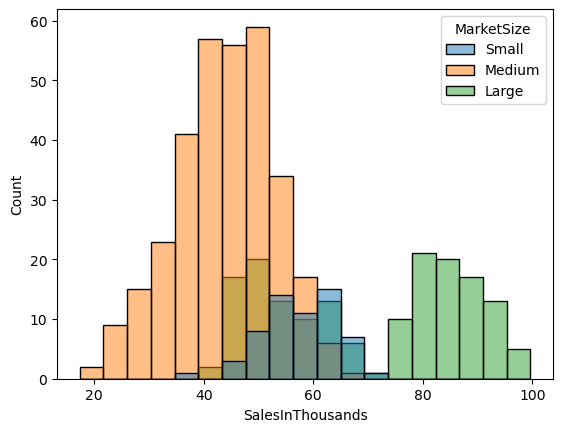

In [56]:
sns.histplot(data=food_df , x='SalesInThousands', hue='MarketSize', hue_order=['Small', 'Medium', 'Large'])
plt.show()

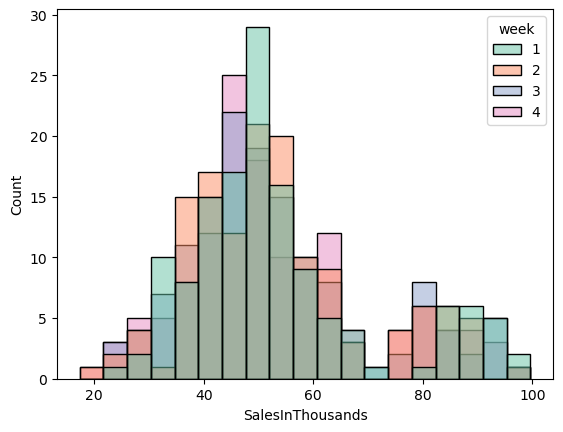

In [72]:
sns.histplot(data=food_df , x='SalesInThousands', hue='week', palette='Set2')
plt.show()

Looking at the above resulting plots, some trends for the dataset seem to be that most of the data is coming from a Medium sized market thereby meaning the dataset is imbalanced as per number of observations from each market size. It also seems that the company seems to have a wide range in terms of differnt store age, however age of the store seems to averag at around 8.5 years. This means the company as a whole has a larger amount of stores on the newer side in terms of their respective market than being more established. 

Looking at the SalesinThounsands versus different featuers within the dataset, some other mentions are that the large market size has the highest number as per sales for the fast food product and on average the small market size seems to be second larger to the medium. This means that though the medium size is the largest as per volumne, not often does this market size seem to be the highest gross income fast food income for the company. 

In terms of SalesinThousands compared to weeks of when each promotion item was offered, it seems when the promotion item was offered in week 1 it had the largest number of people purchasing, but the sale for the company was not at its highest.

### 2.5.3 Numeric Features

#### 2.5.3.1 Numeric data summary

Performing a sanity check on numerical features along with the ydata profile report. 

#### 2.5.3.2 Distributions Of Numeric Feature Values

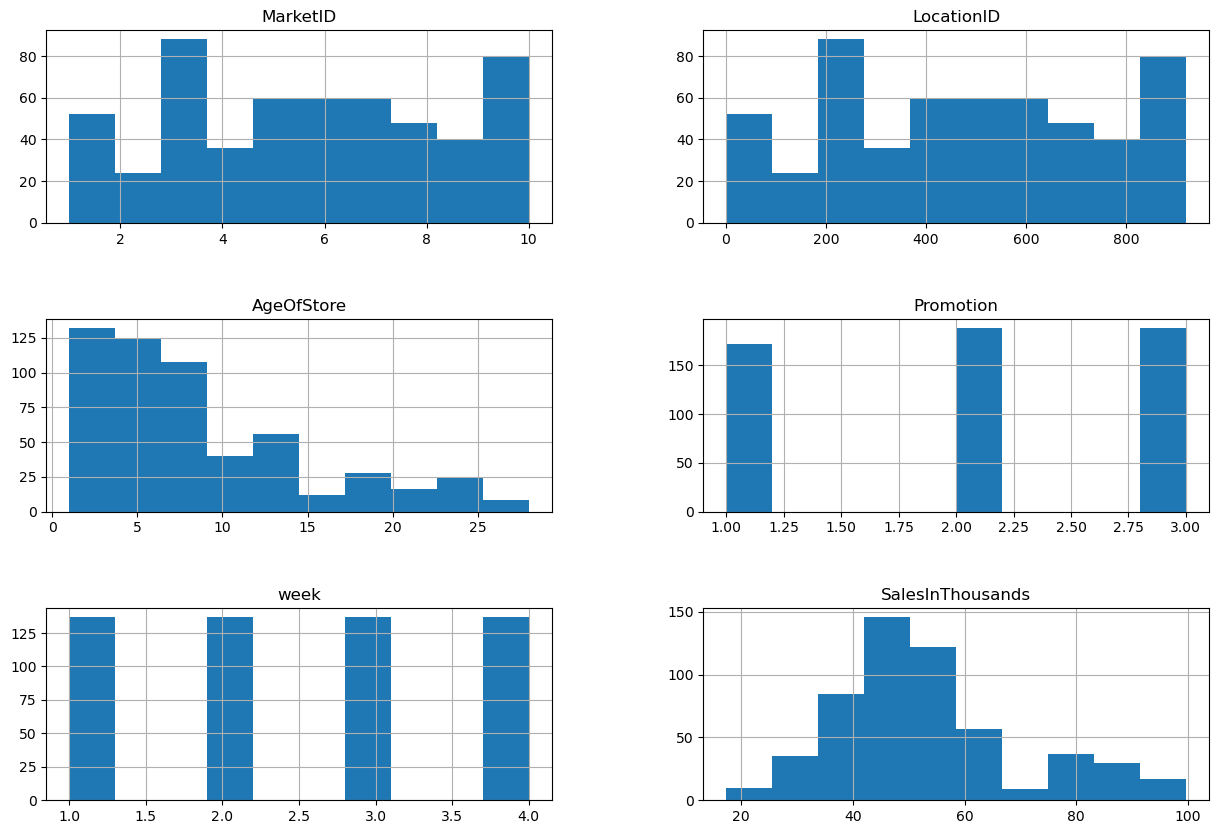

In [35]:
#Code statement below comes from ski_data project but used here to determine distribution of features as well.

food_df.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5);

In [41]:
food_df_dummy = pd.get_dummies(food_df)

Based on this analysis, there seems to be left skews for Credit_Limit, Avg_Open_to_Buy, Total_Trans_Amt, and Avg_Utilization_Ratio columns. 

## Target Feature (SalesInThousands)

Attrition Flag column will be used as the target feature as this provides whether or not currently the customer has attrited from the bank and therefore what facotrs seem to be likely correlated with the column. 

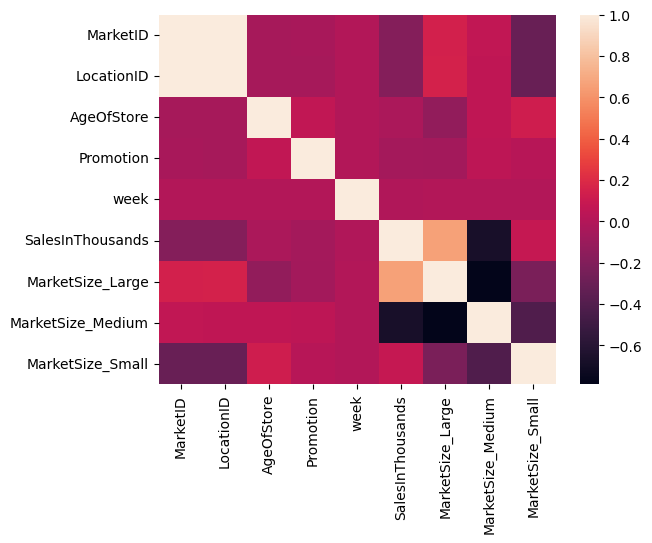

In [43]:
sns.heatmap(food_df_dummy.corr())
plt.show()

In [44]:
#Retrieved just the Attrition_Flag column from the correlation dataframe created and sorted based on correlation values

corr_df = food_df_dummy.corr()
corr_df['SalesInThousands'].sort_values(ascending=False)

SalesInThousands     1.000000
MarketSize_Large     0.661359
MarketSize_Small     0.082595
week                -0.010984
AgeOfStore          -0.028533
Promotion           -0.059212
LocationID          -0.187852
MarketID            -0.192389
MarketSize_Medium   -0.670968
Name: SalesInThousands, dtype: float64

From the correlation values listed above, it seems that customer attrition (attrition flag column) has some level of positive correlation with Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Relationship_Count, Total_Amt_Chng_Q4_Q1, Credit_Limit. There is some negative correlation with Attrition_Flag as well namely Contacts_Count_12_mon, Months_Inactive_12_mon, Customer_Age, Months_on_book, and Dependent_count to be further explored as well.    

## 2.7 Save data

In [83]:
bank_df.shape

(8101, 22)

In [77]:
# save the data to a new csv file
datapath = 'C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets'
bank_df.to_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/bank_data_train_clean.csv')  

## 2.8 Summary

After an intial analysis and "cleaning" of the dataset, columns labeled as 'Unknown' were replaced with np.nan in order to provide proper values to assess missing data. From the columns after imputing np.nan, Education_Level,
Income_Category, and Marital_Status seem to be missing values in the dataset. In the categorical data analysis, seems that all data have appropriate unique values. The bank customer user base of those who were/are subscribed to the bank were/are  blue card holders, with a low income of less than 40k, somewhat distributed between married and single, mostly high school or college educated, and somewhat even distribution between male and female, with females slightly leading. In the numeric feature analysis, seems that Credit_Limit, Avg_Open_to_Buy, Total_Trans_Amt, and Avg_Utilization_Ratio columns have left skews. Looking at the target feature, Attrition_Flag column that details whether or not a customer has attrited within the dataset provided, few correlations were seen namely Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Relationship_Count, Total_Amt_Chng_Q4_Q1, Credit_Limit all having positive correlations with Total_Trans_Ct as highest positive and Contacts_Count_12_mon, Months_Inactive_12_mon, Customer_Age, Months_on_book, and Dependent_count having negative correlations with Contacts_Count_12_mon as most negative. No columns were dropped in order to preserve information however would be wary for left skew columns and columns with NaN values namely Education_Level, Income_Category, and Marital_Status when subsequent steps of model development. Final shape of the dataset is as it began (8101, 22). A ydata profile report is also saved in the data wrangling file folder as a reference.
Further EDA will be conducted in order to also assess user base of customers currently subscribed to the bank and customers who have attritted.